In [9]:
import tensorflow as tf

from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD,Adagrad, RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

import matplotlib.pyplot as plt

In [10]:
(x_train, y_train), (x_test, y_test) = load_data()

In [11]:
print(f"{x_train.shape}, {y_train.shape}")
print(f"{x_test.shape}, {y_test.shape}")

(60000, 28, 28), (60000,)
(10000, 28, 28), (10000,)


In [12]:
x_train_scale = x_train / 255.0
x_test_train = x_test / 255.0

In [13]:
y_train_cate = to_categorical(y_train)
y_test_cate = to_categorical(y_test)

In [14]:
optimizers_list = [SGD(), Adagrad(), RMSprop(), SGD(momentum=0.9), Adam()]

In [15]:
result_list = list()

for optimizer in optimizers_list:
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(8, activation=tf.nn.relu))
    model.add(Dense(64, activation=tf.nn.relu))
    model.add(Dense(32, activation=tf.nn.relu))
    model.add(Dense(10, activation=tf.nn.softmax))
    
    model.compile(loss="categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["acc"])
    
    result = model.fit(x_train_scale, y_train_cate, epochs=5)
    result_list.append(result)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.4837 - loss: 1.4472
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.7929 - loss: 0.5807
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.8210 - loss: 0.5089
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.8294 - loss: 0.4804
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.8373 - loss: 0.4593
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.3207 - loss: 1.9732
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.6450 - loss: 1.1124
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.6712 - loss: 0.9010
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - acc: 0.6901 - loss: 0.8273
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - acc: 0.7032 - loss: 0.7926
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - acc: 0.6770 - loss: 0.8892
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - acc: 0.8189 - loss: 0.5041
Epoch 3/5
1875/1

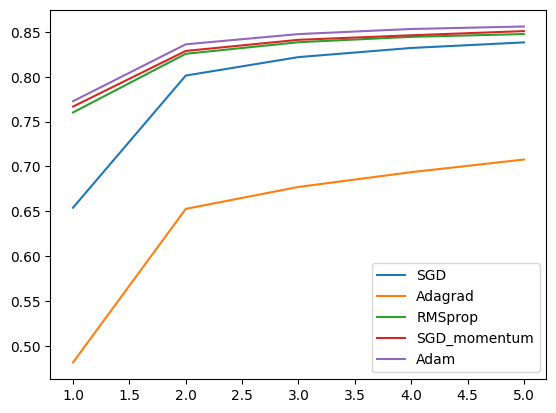

In [16]:
opt_list = ['SGD', 'Adagrad', 'RMSprop', 'SGD_momentum', 'Adam']

for idx, result in enumerate(result_list):
    epochs = range(1, len(result.history['acc']) + 1)
    
    plt.plot(epochs, result.history['acc'], label=opt_list[idx])
    
plt.legend()
plt.show()